# More edge bearing analysis

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)

NOTE: Function declarations will be removed if and when [ relevant pull request](https://github.com/gboeing/osmnx/pull/135) is merged.

Note that OSM files are for the most part made by humans tracing nodes and edges over digital satelite imagery. As a result, they can be less than perfect, and this can sometimes cause slight hiccups in our analysis of grid bearings.

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd

ox.config(log_file=True, log_console=True, use_cache=True)

In [174]:
# get the street network for Williamsburg, Brooklynn
north, south, east, west = 40.73, 40.71, -73.95, -73.97
G = ox.graph_from_bbox(north, south, east, west, network_type='drive', simplify=False)

In [170]:
# add bearing to each of the edges
ox.utils.add_edge_bearings(G)


In [156]:
def add_search_bearings(search_bearing, perpendicular=True):
    """
    Take in a single bearing or list of bearings and returns it either as a list
    of itself if perpendicular is set to False or a list of itself and all its
    parallel and perpendicular bearings if perpendicular is kept set to True.
    Use for filtering objects by desired bearings.
    """

    search_list=[]
    if type(search_bearing) == list:
        for i in search_bearing:
            search_list.append(i)
            if perpendicular==True:
                for t in range(3):
                    search_list.append((i+(90*(t+1)))%360)
            else:
                pass
    elif type(search_bearing) == int:
        search_list.append(search_bearing)
        if perpendicular==True:
            for t in range(3):
                search_list.append((search_bearing+(90*(t+1)))%360)
        else:
            pass
    else:
        print("Please make sure the bearing(s) you are searching for are either an integer or a list of integers")
    return search_list

In [157]:
def add_more_edge_bearing_info(G):
    """
    Take compass bearing info from edges of a networkx multidigraph and adds
    new 2 attributes 'rounded_bearing' for their rounded bearing and
    'modulo_bearing' the rounded_bearing modulo 90, which allows edges to be
    organized into 90 distinct groups of parallel and perpendicular rounded
    bearings.
    Requires add_edge_bearings() first.
    """

    for u,v,a in G.edges(data=True):
        a['rounded_bearing']=int(round(a['bearing']))
        a['modulo_bearing']=a['rounded_bearing']%90

## Plot the edges by perpendicular bearing

Plot groups of edges that share the same parallel and perpendicular bearings with different colors of the rainbow.

In [173]:
# modifies info gotten from ox.utils.add_edge_bearings(G) to add rounded bearings and other info to edges to allow them to be grouped easier 

add_more_edge_bearing_info(G)

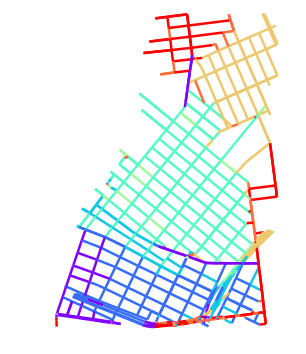

In [159]:
# plots network with a different color for each group of edges who share prependicular and parallel edges
ec = ox.get_edge_colors_by_attr(G, 'modulo_bearing', num_bins=8, cmap='rainbow', start=0, stop=1)
fig, ax = ox.plot_graph(G, node_size=0.3, edge_color=ec, edge_linewidth=2.5, edge_alpha=1)

## Plot desired bearings contrasted with other bearings

In [171]:
# set up the list of desired bearings to search for in the network
search_bearings = add_search_bearings(19, perpendicular=False)

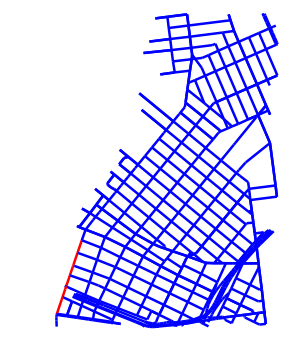

In [161]:
# plots network with all edges of desired bearing(s) the color red('r') and all others the color blue('b')
ec = ['r' if data['rounded_bearing'] in search_bearings else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0.3, edge_color=ec, edge_linewidth=2.5, edge_alpha=1)

## Plot desired perpendicular bearings

In [177]:
# set up the list of desired bearings but leave perpendicular to remain set to True
search_bearings = add_search_bearings(19)

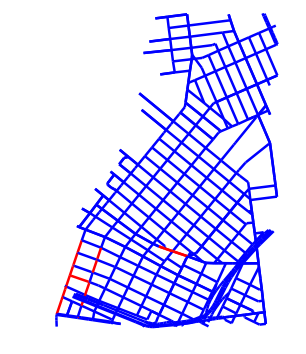

In [168]:
# plots network with all edges of desired bearing(s) the color red('r') and all others the color blue('b')
ec = ['r' if data['rounded_bearing'] in search_bearings else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0.3, edge_color=ec, edge_linewidth=2.5, edge_alpha=1)

#### Plot only the desired perpendicular bearings:

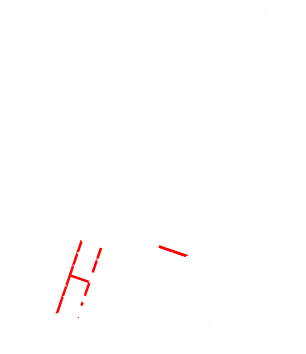

In [164]:
# plots network with all edges of desired bearing(s) the color red('r') and all others the color w('w') 
ec = ['r' if data['rounded_bearing'] in search_bearings else 'w' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0.3, edge_color=ec, edge_linewidth=2.5, edge_alpha=1)

So, we decreased the average slope along the route from a 5% grade to a 2% grade. The total elevation change is obviously the same with either route, but using our impedance function we decrease the total ascent from 64 meters to 37 meters (but the trip distance increases from 1.7 km to 2.4 km).